<a href="https://colab.research.google.com/github/Adefunke01/Adefunke01/blob/main/AI_workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('gdrive/My Drive/phytoplankton.csv', encoding= 'unicode_escape')

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df[:828]
df

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,ND,40,ND,7080,ND,ND,ND,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,ND,40,ND,ND,ND,ND,ND,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [ ]:
def clean_data(df):
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0) 
    
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce')
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')
    
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)
clean_data(df)

In [ ]:
df['Alexandrium spp. \ncells L-1\n(PSP)'].unique()

array([  0.,  -1., 200.,  40., 100., 120.,  80., 320., 400., 500., 160.,
       240.])

In [ ]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [ ]:
def check_thresholds(df):  
    t = []
    for i,j in enumerate(df["Sample number"]):    
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]       
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]    
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]    
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]    
        
        
        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:      
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:      
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:      
            threshold_reached = 1    
        t.append(threshold_reached)
    return t

In [ ]:
thresholds_reached = check_thresholds(df)
df['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(df, './thresholds_cleaned.csv', sep=',', index=False)

In [ ]:
x = pd.read_csv('./thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
y = pd.read_csv('./thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import*
from keras.utils import np_utils

In [48]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.summary()

model.compile(loss='binary_crossentropy',              
              optimizer='adam',              
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 5)                 5005      
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
history = model.fit(x_train, y_train,                    
                    batch_size=16,                    
                    epochs=10,                    
                    verbose=1,                    
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.8761 - val_loss: nan - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 8/10
42/42 [==============================] - 0s 3ms/ste

In [50]:
model.summary()

model.compile(loss='binary_crossentropy',              
              optimizer='adam',             
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 5)                 5005      
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(x_train, y_train,                    
                    batch_size=16,                    
                    epochs=10,                    
                    verbose=1,                    
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 0.5255 - accuracy: 0.7900 - val_loss: 0.4430 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.8837 - val_loss: 0.4261 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8837 - val_loss: 0.4122 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.8837 - val_loss: 0.3924 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8852 - val_loss: 0.3736 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8927 - val_loss: 0.3512 - val_accuracy: 0.8976
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.9003 - val_loss: 0.3177 - val_accuracy: 0.9518
Epoch 8/10
42/42 [==

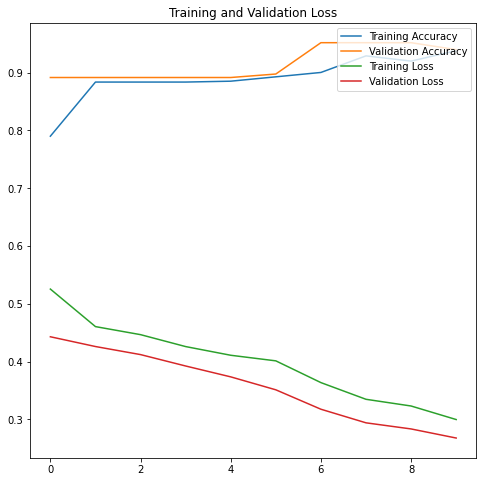

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

In [53]:
predictions = np.zeros(len(x_test))

In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [56]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel())

In [59]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 

After OverSampling, counts of label '1': 733
After OverSampling, counts of label '0': 733


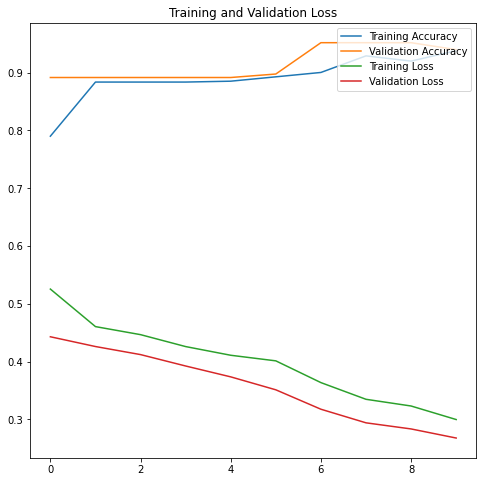

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

0                                          Alexandrium spp. \ncells L-1\n(PSP)  ...  thresholds_reached
0                                                                               ...                    
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000  ...            0.455902
Dinophysiaceae \ncells L-1\n(DSP)                                     0.055174  ...            0.461656
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.008287  ...            0.140486
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                              0.019008  ...            0.258077
NaN                                                                        NaN  ...                 NaN
NaN                                                                        NaN  ...                 NaN
thresholds_reached                                                    0.455902  ...            1.000000

[7 rows x 7 columns]


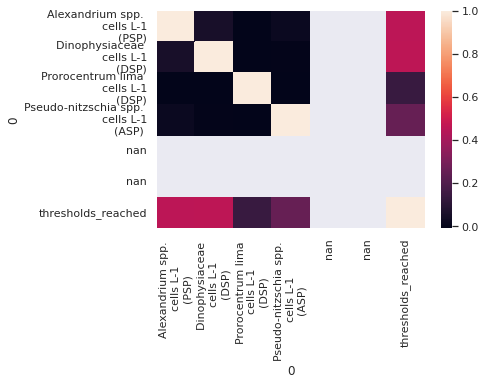

In [61]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

corrMatrix = df.corr()
print (corrMatrix)
ax = sns.heatmap(corrMatrix)